Join properties to DataFrames of the oc

In [4]:
using DataFrames , Statistics
using Query, Glob
using PyPlot

import CSV

## directory
rootdir = ENV["GAIA_ROOT"]
wdir    = "$rootdir/products"
votdir  = "$rootdir/products/votable"

cd(wdir)

In [5]:
# import final sample and original one with ages, etc..

sample= rootdir*"/master/notebooks/data/BrowseTargets.18292.1530479692.fake"
df1= CSV.read(sample, delim= "|")
df1.name= strip.(df1.name)


finalsample=wdir*"/votlist.finalSample_metric0.01.csv"
df2= CSV.read(finalsample, delim= ";")

ndat= size(df2)

## UGLY fix for name with a "-" in it
name=[]
for vot in df2.votname
    t= split(vot,"-")
    if length(t) == 3
        t[1]= t[1]*"-"*t[2]
    end
    push!(name,t[1])
end

df2[:name]= name


df3= join(df1, df2, on = :name, makeunique= true)

i= 0
for na in df2.name
    i += 1
    if !(na in df1.name)
        println(na)
        println(i)
    end
end

dfselect= sort(df3[:, [:votname, :name,:log_age]], order(:votname))

CSV.write("votlist.finalSample_metric0.01-age.csv", dfselect, delim= ";")

"votlist.finalSample_metric0.01-age.csv"

In [17]:
## Joint age with ALL votname

cd(votdir)
files= glob("*vot")
cd(wdir)

dfsample = DataFrames.DataFrame(votname= String[],name= String[])

for f in files
    t= split(f,"-")
    if length(t) == 3
        t[1]= t[1]*"-"*t[2]
    end
    nameoc= t[1]
    push!(dfsample,[f, nameoc])
end


dfage= join(df1, dfsample, on = :name, makeunique= true)
dfselect= sort(dfage[:, [:votname,:log_age]], order(:votname))
println(dfsample)

CSV.write("votlist-age.csv", dfselect, delim= ";")

1155×2 DataFrame
│ Row  │ votname                      │ name              │
│      │ String                       │ String            │
├──────┼──────────────────────────────┼───────────────────┤
│ 1    │ AH03 J0822-36.4-1.0deg.vot   │ AH03 J0822-36.4   │
│ 2    │ ASCC 1-1.0deg.vot            │ ASCC 1            │
│ 3    │ ASCC 10-2.7deg.vot           │ ASCC 10           │
│ 4    │ ASCC 100-1.8deg.vot          │ ASCC 100          │
│ 5    │ ASCC 101-2.5deg.vot          │ ASCC 101          │
│ 6    │ ASCC 102-1.0deg.vot          │ ASCC 102          │
│ 7    │ ASCC 103-1.4deg.vot          │ ASCC 103          │
│ 8    │ ASCC 104-2.0deg.vot          │ ASCC 104          │
│ 9    │ ASCC 105-2.3deg.vot          │ ASCC 105          │
│ 10   │ ASCC 106-2.6deg.vot          │ ASCC 106          │
│ 11   │ ASCC 107-1.0deg.vot          │ ASCC 107          │
│ 12   │ ASCC 108-1.0deg.vot          │ ASCC 108          │
│ 13   │ ASCC 109-1.7deg.vot          │ ASCC 109          │
│ 14   │ ASCC 11-2.0deg

│ 146  │ Berkeley 15-1.0deg.vot       │ Berkeley 15       │
│ 147  │ Berkeley 17-1.1deg.vot       │ Berkeley 17       │
│ 148  │ Berkeley 28-1.0deg.vot       │ Berkeley 28       │
│ 149  │ Berkeley 43-1.0deg.vot       │ Berkeley 43       │
│ 150  │ Berkeley 44-1.0deg.vot       │ Berkeley 44       │
│ 151  │ Berkeley 47-1.0deg.vot       │ Berkeley 47       │
│ 152  │ Berkeley 50-1.1deg.vot       │ Berkeley 50       │
│ 153  │ Berkeley 55-1.0deg.vot       │ Berkeley 55       │
│ 154  │ Berkeley 59-1.1deg.vot       │ Berkeley 59       │
│ 155  │ Berkeley 68-1.0deg.vot       │ Berkeley 68       │
│ 156  │ Berkeley 80-1.0deg.vot       │ Berkeley 80       │
│ 157  │ Berkeley 82-1.0deg.vot       │ Berkeley 82       │
│ 158  │ Berkeley 85-1.2deg.vot       │ Berkeley 85       │
│ 159  │ Berkeley 86-1.0deg.vot       │ Berkeley 86       │
│ 160  │ Berkeley 87-1.0deg.vot       │ Berkeley 87       │
│ 161  │ Berkeley 9-1.0deg.vot        │ Berkeley 9        │
│ 162  │ Berkeley 95-1.0deg.vot       │ 

│ 363  │ FSR 0430-1.0deg.vot          │ FSR 0430          │
│ 364  │ FSR 0435-1.0deg.vot          │ FSR 0435          │
│ 365  │ FSR 0441-1.0deg.vot          │ FSR 0441          │
│ 366  │ FSR 0442-1.0deg.vot          │ FSR 0442          │
│ 367  │ FSR 0443-1.0deg.vot          │ FSR 0443          │
│ 368  │ FSR 0451-1.0deg.vot          │ FSR 0451          │
│ 369  │ FSR 0477-1.0deg.vot          │ FSR 0477          │
│ 370  │ FSR 0496-1.0deg.vot          │ FSR 0496          │
│ 371  │ FSR 0498-1.0deg.vot          │ FSR 0498          │
│ 372  │ FSR 0516-1.0deg.vot          │ FSR 0516          │
│ 373  │ FSR 0519-1.0deg.vot          │ FSR 0519          │
│ 374  │ FSR 0524-1.0deg.vot          │ FSR 0524          │
│ 375  │ FSR 0534-1.0deg.vot          │ FSR 0534          │
│ 376  │ FSR 0542-1.0deg.vot          │ FSR 0542          │
│ 377  │ FSR 0544-1.0deg.vot          │ FSR 0544          │
│ 378  │ FSR 0581-1.0deg.vot          │ FSR 0581          │
│ 379  │ FSR 0596-1.0deg.vot          │ 

│ 597  │ IC 1442-1.0deg.vot           │ IC 1442           │
│ 598  │ IC 1805-1.4deg.vot           │ IC 1805           │
│ 599  │ IC 1848-1.4deg.vot           │ IC 1848           │
│ 600  │ IC 2391-3.9deg.vot           │ IC 2391           │
│ 601  │ IC 2395-1.2deg.vot           │ IC 2395           │
│ 602  │ IC 2488-1.1deg.vot           │ IC 2488           │
│ 603  │ IC 2602-6.0deg.vot           │ IC 2602           │
│ 604  │ IC 2714-1.0deg.vot           │ IC 2714           │
│ 605  │ IC 446-1.0deg.vot            │ IC 446            │
│ 606  │ IC 4651-1.2deg.vot           │ IC 4651           │
│ 607  │ IC 4665-3.5deg.vot           │ IC 4665           │
│ 608  │ IC 4725-1.9deg.vot           │ IC 4725           │
│ 609  │ IC 4756-4.0deg.vot           │ IC 4756           │
│ 610  │ IC 4996-1.1deg.vot           │ IC 4996           │
│ 611  │ IRAS 02232+6138-1.0deg.vot   │ IRAS 02232+6138   │
│ 612  │ IRAS 06567-0355-1.0deg.vot   │ IRAS 06567-0355   │
│ 613  │ Ivanov 8-1.0deg.vot          │ 

│ 829  │ NGC 2483-1.0deg.vot          │ NGC 2483          │
│ 830  │ NGC 2509-1.0deg.vot          │ NGC 2509          │
│ 831  │ NGC 2516-3.5deg.vot          │ NGC 2516          │
│ 832  │ NGC 2527-1.7deg.vot          │ NGC 2527          │
│ 833  │ NGC 2539-2.2deg.vot          │ NGC 2539          │
│ 834  │ NGC 2546-2.8deg.vot          │ NGC 2546          │
│ 835  │ NGC 2547-1.5deg.vot          │ NGC 2547          │
│ 836  │ NGC 2548-3.6deg.vot          │ NGC 2548          │
│ 837  │ NGC 2567-1.0deg.vot          │ NGC 2567          │
│ 838  │ NGC 2571-1.0deg.vot          │ NGC 2571          │
│ 839  │ NGC 2632-15.5deg.vot         │ NGC 2632          │
│ 840  │ NGC 2659-1.0deg.vot          │ NGC 2659          │
│ 841  │ NGC 2669-1.4deg.vot          │ NGC 2669          │
│ 842  │ NGC 2670-1.0deg.vot          │ NGC 2670          │
│ 843  │ NGC 2671-1.0deg.vot          │ NGC 2671          │
│ 844  │ NGC 2682-5.2deg.vot          │ NGC 2682          │
│ 845  │ NGC 2910-1.0deg.vot          │ 

│ 1064 │ Ruprecht 64-2.2deg.vot       │ Ruprecht 64       │
│ 1065 │ Ruprecht 65-1.0deg.vot       │ Ruprecht 65       │
│ 1066 │ Ruprecht 67-1.0deg.vot       │ Ruprecht 67       │
│ 1067 │ Ruprecht 71-1.0deg.vot       │ Ruprecht 71       │
│ 1068 │ Ruprecht 76-1.0deg.vot       │ Ruprecht 76       │
│ 1069 │ Ruprecht 78-1.0deg.vot       │ Ruprecht 78       │
│ 1070 │ Ruprecht 79-1.0deg.vot       │ Ruprecht 79       │
│ 1071 │ Ruprecht 84-1.0deg.vot       │ Ruprecht 84       │
│ 1072 │ Ruprecht 85-1.0deg.vot       │ Ruprecht 85       │
│ 1073 │ Ruprecht 88-1.0deg.vot       │ Ruprecht 88       │
│ 1074 │ Ruprecht 89-1.0deg.vot       │ Ruprecht 89       │
│ 1075 │ Ruprecht 91-1.0deg.vot       │ Ruprecht 91       │
│ 1076 │ Ruprecht 93-1.0deg.vot       │ Ruprecht 93       │
│ 1077 │ Ruprecht 96-1.0deg.vot       │ Ruprecht 96       │
│ 1078 │ Ruprecht 98-1.4deg.vot       │ Ruprecht 98       │
│ 1079 │ Ruprecht 99-1.1deg.vot       │ Ruprecht 99       │
│ 1080 │ SAI 118-1.0deg.vot           │ 

"votlist-age.csv"

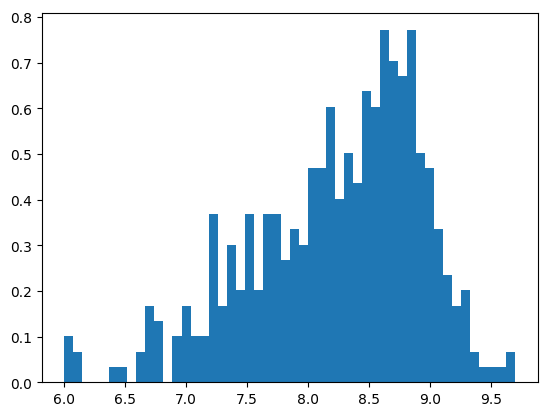

## Age distribution


In [7]:
PyPlot.hist(dfselect[:log_age], 50, density=true)
println("## Age distribution")